In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [37]:
%matplotlib inline

In [38]:
df_merge3 = pd.read_csv("college-salaries/clean_data.csv")

In [39]:
df_merge3["Bin"] = pd.qcut(df_merge3["Early Career"], 4, labels = ["low","mid-low","mid-high","high"])

In [40]:
df_merge3.loc[:,["Early Career","Bin"]].head()

,Early Career,Bin
0,46200,mid-high
1,46000,mid-high
2,54200,high
3,38300,low
4,49000,mid-high


In [41]:
# df_merge3.groupby("Bin")["ADM_RATE_ALL"].mean()

In [42]:
df_cip = pd.melt(df_merge3,"Bin",df_merge3.iloc[:,24:61])

In [43]:
df_cip2 = df_cip.groupby(["Bin","variable"]).mean().sort_values("value", ascending = False).reset_index()

df_cip2.head()

,Bin,variable,value
0,low,"Business, Management, and Marketing",0.191623
1,mid-low,"Business, Management, and Marketing",0.191097
2,mid-high,"Business, Management, and Marketing",0.181374
3,high,Health Professions,0.145715
4,high,"Business, Management, and Marketing",0.144884


In [44]:
df_cip2[df_cip2["Bin"] == "low"].sort_values("value", ascending = False).head(10)

,Bin,variable,value
0,low,"Business, Management, and Marketing",0.191623
7,low,Health Professions,0.113787
10,low,Education,0.089137
18,low,Psychology,0.061702
20,low,"Liberal Arts and Sciences, General Studies and...",0.058858
24,low,"Homeland Security, Law Enforcement and Firefig...",0.049685
25,low,Visual/Performing Arts,0.049480
28,low,Theology and Religious Vocations,0.048498
30,low,Biological and Biomedical Studies,0.046825
36,low,"Parks, Recreation, Leisure, and Fitness Studies",0.035594


In [45]:
df_cip2[df_cip2["Bin"] == "high"].sort_values("value", ascending = False).head(10)

,Bin,variable,value
3,high,Health Professions,0.145715
4,high,"Business, Management, and Marketing",0.144884
8,high,Engineering,0.104467
9,high,Social Sciences,0.097294
14,high,Biological and Biomedical Studies,0.068206
22,high,Psychology,0.052330
29,high,Visual/Performing Arts,0.048226
37,high,Communication and Journalism,0.034890
39,high,Computer and Information Sciences and Support ...,0.033442
45,high,English Language and Literature/Letters,0.025828


Mean early career pay: 
46835.32171581769

Median early career pay: 
45800.0


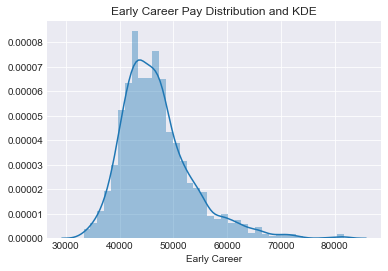

In [46]:
sns.distplot(df_merge3["Early Career"])

print(f"Mean early career pay: ")
print(df_merge3["Early Career"].mean())
print(f"\nMedian early career pay: ")
print(df_merge3["Early Career"].median())

plt.title("Early Career Pay Distribution and KDE")
plt.savefig("dist.png")
plt.show()

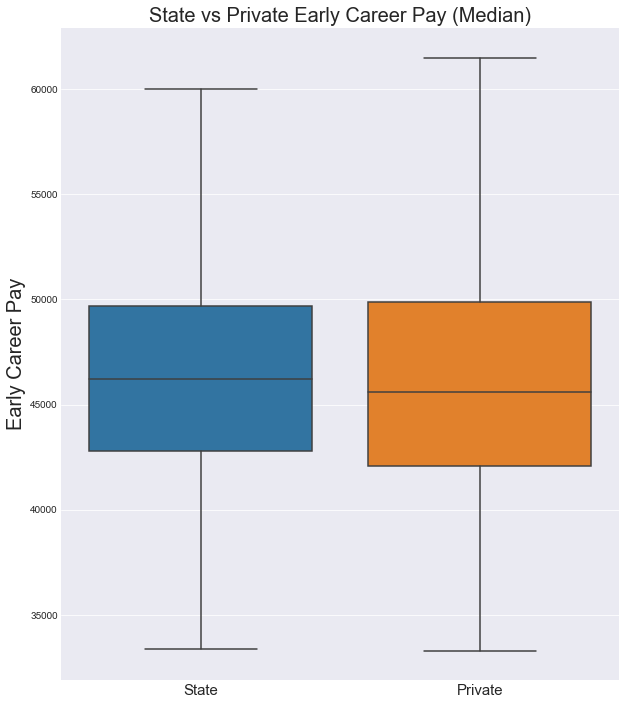

In [47]:
fig = plt.figure(figsize=(10,12))

schoolCat= []

for x in range(len(df_merge3["School Type"])):
    if "Private" in df_merge3["School Type"][x]:
        schoolCat.append("Private")
    elif "State" in df_merge3["School Type"][x]:
        schoolCat.append("State")
    else:
        schoolCat.append("Other")


sns.boxplot(x = schoolCat,y = df_merge3["Early Career"], showfliers = False)

plt.xticks(fontsize = 15)
plt.ylabel("Early Career Pay",fontsize = 20)
plt.title("State vs Private Early Career Pay (Median)", fontsize=20)
plt.savefig("box.png")
plt.show()

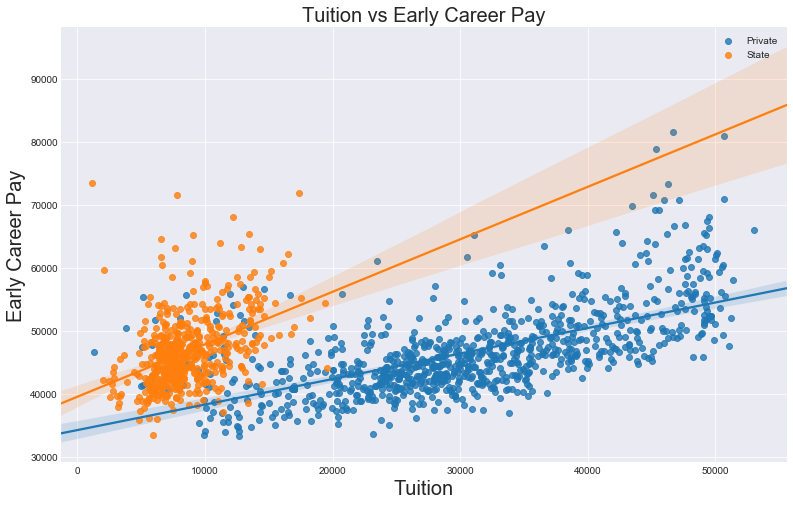

In [48]:
df_merge3["School Category"] = schoolCat

fig = plt.figure(figsize = (13,8))

plot = sns.regplot(x = df_merge3[df_merge3["School Type"].str.contains("Private")]["TUITIONFEE_IN State"], y = df_merge3[df_merge3["School Type"].str.contains("Private")]["Early Career"], label = "Private")
plot = sns.regplot(x = df_merge3[df_merge3["School Type"].str.contains("State")]["TUITIONFEE_IN State"], y = df_merge3[df_merge3["School Type"].str.contains("State")]["Early Career"], label = "State")

plt.xlabel("Tuition", fontsize = 20)
plt.ylabel("Early Career Pay", fontsize = 20)

plt.legend()
plt.title("Tuition vs Early Career Pay", fontsize=20)
plt.savefig("regplot.png")
plt.show()

In [49]:
df_merge3 = df_merge3.dropna()

print("\n")
print(stats.linregress(x = df_merge3[df_merge3["School Type"].str.contains("Private")]["TUITIONFEE_IN State"], y = df_merge3[df_merge3["School Type"].str.contains("Private")]["Early Career"]))
print("\n")
print(stats.linregress(x = df_merge3[df_merge3["School Type"].str.contains("State")]["TUITIONFEE_IN State"], y = df_merge3[df_merge3["School Type"].str.contains("State")]["Early Career"]))



LinregressResult(slope=0.45009483486763685, intercept=32569.462133631507, rvalue=0.6389105973156414, pvalue=2.3269115744038015e-90, stderr=0.019466957888892827)


LinregressResult(slope=0.829426501485647, intercept=39745.02504727941, rvalue=0.388895125922407, pvalue=2.158488395039148e-19, stderr=0.08831519023981586)


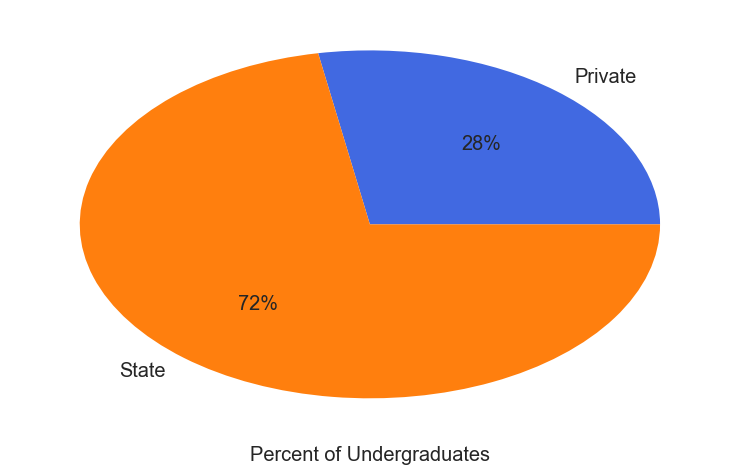

In [50]:
fig = plt.figure(figsize=(13,8))

df_merge3.groupby("School Category")["UGDS"].sum().plot(kind = "PIE", colors = ["royalblue","#ff7f0e"], textprops={'fontsize': 20}, autopct='%1.0f%%')

plt.ylabel("", fontsize = 20)
plt.xlabel("Percent of Undergraduates",fontsize = 20)

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation = 360, fontsize = 20)
plt.tick_params(axis='y', which='major', labelsize=12)

plt.savefig("pie.png")

plt.show()

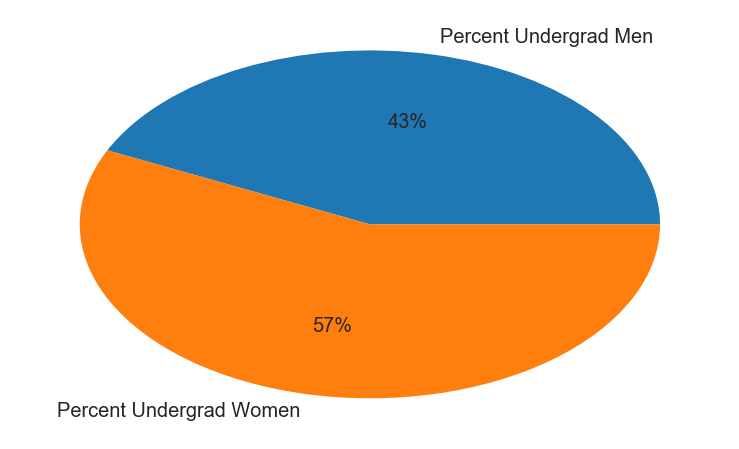

In [51]:
fig = plt.figure(figsize=(13,8))

df_demo = pd.melt(df_merge3,["School Category"],df_merge3.iloc[:,84:86])

df_demo.groupby(["variable"])["value"].sum().plot(kind = "pie", autopct='%1.0f%%', textprops={'fontsize': 20})

plt.ylabel("", fontsize = 20)

plt.savefig("pie2.png")

plt.show()

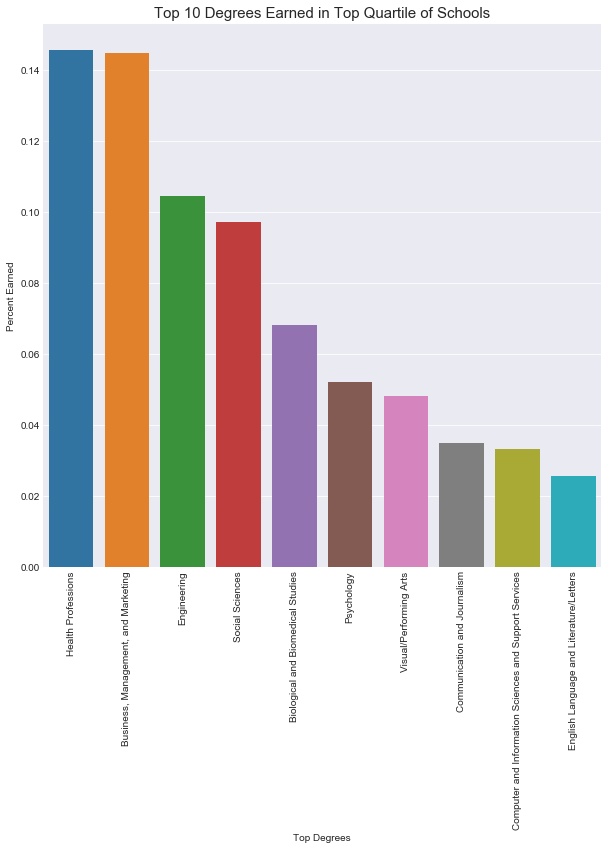

<Figure size 432x288 with 0 Axes>

In [52]:
fig_pie1=plt.figure(figsize=(10,10))
hi_values=df_cip2[df_cip2["Bin"] == "high"]["value"].head(10)
hi_labels=df_cip2[df_cip2["Bin"] == "high"]["variable"].head(10)
hi_data=pd.DataFrame({"Percent Earned":hi_values, "Top Degrees":hi_labels})
# plt.pie(df_cip2[df_cip2["Bin"] == "high"]["value"].head(10),labels = df_cip2[df_cip2["Bin"] == "high"]["variable"].head(10))

sns.set_style("darkgrid")
sns.barplot(x="Top Degrees", y="Percent Earned", data=hi_data)
plt.xticks(rotation="vertical" )
plt.title("Top 10 Degrees Earned in Top Quartile of Schools", fontsize=15)
plt.savefig("Top_Degrees_for_Top_Schools.png")
plt.show()

plt.tight_layout()

In [53]:
degreespay = "college-salaries/degrees-that-pay-back.csv"
df = pd.read_csv(degreespay)
df=df[["Undergraduate Major", "Starting Median Salary"]]
df["Starting Median Salary"]=df["Starting Median Salary"].str.replace("$", "")
df["Starting Median Salary"]=df["Starting Median Salary"].str.replace(",","")
df["Starting Median Salary"]=df["Starting Median Salary"].astype(float)
df.head()

,Undergraduate Major,Starting Median Salary
0,Accounting,46000.0
1,Aerospace Engineering,57700.0
2,Agriculture,42600.0
3,Anthropology,36800.0
4,Architecture,41600.0


In [54]:
df_new=df.sort_values('Starting Median Salary', ascending=False).head(10)
df_new

,Undergraduate Major,Starting Median Salary
43,Physician Assistant,74300.0
8,Chemical Engineering,63200.0
12,Computer Engineering,61400.0
19,Electrical Engineering,60900.0
38,Mechanical Engineering,57900.0
1,Aerospace Engineering,57700.0
30,Industrial Engineering,57700.0
13,Computer Science,55900.0
40,Nursing,54200.0
10,Civil Engineering,53900.0


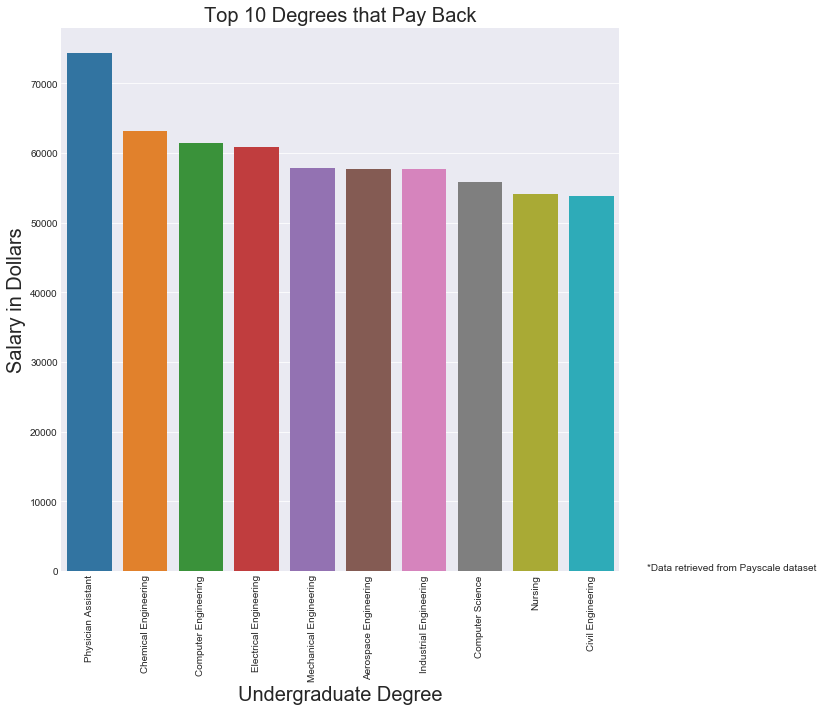

In [55]:
fig=plt.figure(figsize=(10,10))

sns.barplot(x = 'Undergraduate Major', y='Starting Median Salary', data=df_new)
plt.xlabel("Undergraduate Degree", fontsize = 20)
plt.title("Top 10 Degrees that Pay Back", fontsize = 20)
plt.ylabel("Salary in Dollars", fontsize = 20)
plt.xticks(rotation="vertical")
plt.text(10, 100, "*Data retrieved from Payscale dataset")


plt.savefig("Top10.png")
plt.show()

In [56]:
import plotly.plotly as py


In [57]:
avg_tuition_state=df_merge3.groupby(['STABBR'])['Paid Tuition per Full time student'].mean()
df = pd.DataFrame({'state':avg_tuition_state.index, 'tuition':avg_tuition_state.values})

scl = [[0.0, 'rgb(26,152,80)'],[0.2, 'rgb(145,207,96)'],[0.4, 'rgb(217,239,139)'],\
           [0.6, 'rgb(254,224,139)'],[0.8, 'rgb(252,141,89)'],[1.0, 'rgb(215,48,39)']]

data = [dict(
        type='choropleth', 
        colorscale = scl,
        autocolorscale = False,
        locations = df['state'],
        z = df['tuition'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict(
                color = 'rgb(255,255,255)',
                width = 2
            )),
         colorbar = dict(
             title = "Tuition")
         )]

layout = dict(
          title = 'Average Tuition by State',
          geo = dict(
              scope='usa',
              projection=dict(type='albers usa'),
              showlakes = True,
              lakecolor = 'rgb(255,255,255)'),
             )
fig = dict(data=data, layout=layout)
py.iplot(fig)

In [58]:
#Avg DTI (Debt to Income) % by state
df_merge=pd.DataFrame(df_merge3[df_merge3["Graduate Median Debt"]!='PrivacySuppressed'])
df_merge["Graduate Median Debt"]=df_merge["Graduate Median Debt"].astype(float)
grad_avg_debt = df_merge.groupby(['STABBR'])['Graduate Median Debt'].mean()
avg_early_pay = df_merge.groupby(['STABBR'])['Early Career'].mean()
DTI = grad_avg_debt/avg_early_pay*100
df2 = pd.DataFrame({'state':grad_avg_debt.index, 'Avg Median Debt by State':grad_avg_debt.values, 'Avg Early Pay by State':avg_early_pay.values, 'DTI':DTI.values})

data2 = [dict(
        type='choropleth', 
        colorscale = scl,
        autocolorscale = False,
        locations = df2['state'],
        z = df2['DTI'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict(
                color = 'rgb(255,255,255)',
                width = 2
            )),
         colorbar = dict(
             title = "DTI %")
         )]

layout2 = dict(
          title = 'DTI % Average by State',
          geo = dict(
              scope='usa',
              projection=dict(type='albers usa'),
              showlakes = True,
              lakecolor = 'rgb(255,255,255)'),
             )
fig2 = dict(data=data2, layout=layout2)
py.iplot(fig2)

In [59]:
#Avg early career pay by state
early_career_state=df_merge.groupby(['STABBR'])['Early Career'].mean()
df3 = pd.DataFrame({'state':early_career_state.index, 'Avg Early Career Pay':early_career_state.values})
data3 = [dict(
        type='choropleth', 
        colorscale = scl,
        autocolorscale = False,
        locations = df2['state'],
        z = df3['Avg Early Career Pay'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict(
                color = 'rgb(255,255,255)',
                width = 2
            )),
         colorbar = dict(
             title = "Early Career Pay ($)")
         )]

layout3 = dict(
          title = 'Avereage Early Career Pay by State',
          geo = dict(
              scope='usa',
              projection=dict(type='albers usa'),
              showlakes = True,
              lakecolor = 'rgb(255,255,255)'),
             )
fig3 = dict(data=data3, layout=layout3)
py.iplot(fig3)

In [60]:
#locations of where higher earning degrees are
healthcare_state=df_merge.groupby(['STABBR'])['Health Professions'].sum()
engineering_state=df_merge.groupby(['STABBR'])['Engineering'].sum()
engineeringtech_state=df_merge.groupby(['STABBR'])['Engineering Technologies and Engineering-Related Fields'].sum()
compsci_state=df_merge.groupby(['STABBR'])['Computer and Information Sciences and Support Services'].sum()
total_high_degrees = healthcare_state + engineering_state + engineeringtech_state + compsci_state
df5 = pd.DataFrame({'state':healthcare_state.index, '% avg healthcare degrees':healthcare_state.values, '% avg engineering degrees':engineering_state.values, '% avg engineering tech degrees':engineeringtech_state.values, '%avg comp sci degrees':compsci_state.values, 'total':total_high_degrees.values})

data5 = [dict(
        type='choropleth', 
        colorscale = scl,
        autocolorscale = False,
        locations = df5['state'],
        z = df5['total'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict(
                color = 'rgb(255,255,255)',
                width = 2
            )),
         colorbar = dict(
             title = "Avg % by State of <br>Degrees Received")
         )]

layout5 = dict(
          title = 'Where the Highest Earning Degrees are being Received <br>(Healthcare, Engineering, Computer Science)',
          geo = dict(
              scope='usa',
              projection=dict(type='albers usa'),
              showlakes = True,
              lakecolor = 'rgb(255,255,255)'),
             )
fig5 = dict(data=data5, layout=layout5)
py.iplot(fig5)
